Computing the solution.
Plotting.


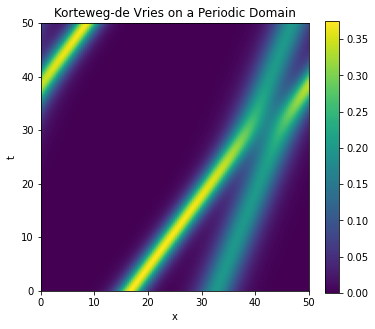

In [1]:
#!python

import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff
%matplotlib inline

def kdv_exact(x, c):
    """Profile of the exact solution to the KdV for a single soliton on the real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)

    # Compute du/dt.
    dudt = -6*u*ux-uxxx

    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""

    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol


if __name__ == "__main__":
    # Set the size of the domain, and create the discretized grid.
    L = 50.0
    N = 128
    dx = L / (N - 1.0)
    x = np.linspace(0, (1-1.0/N)*L, N)

    # Set the initial conditions.
    # Not exact for two solitons on a periodic domain, but close enough...
    u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)

    # Set the time sample grid.
    T = 50
    t = np.linspace(0, T, 501)

    print("Computing the solution.")
    sol = kdv_solution(u0, t, L)


    print("Plotting.")

    import matplotlib.pyplot as plt

    plt.figure(figsize=(6,5))
    plt.imshow(sol[::-1, :], extent=[0,L,0,T])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title('Korteweg-de Vries on a Periodic Domain')
    plt.show()

In [4]:
# import pickle
# data = {'t':t, 'x':x, 'u':sol}
# filehandler = open('KdV_simple2.pkl', 'wb') 
# pickle.dump(data, filehandler)

In [5]:
# infile = open('KdV_simple2.pkl','rb')
# new_dict = pickle.load(infile)
# infile.close()